<a href="https://colab.research.google.com/github/juhumkwon/source_code/blob/main/%EC%A3%BC%EA%B0%80%EC%98%88%EC%B8%A1(%EC%9D%BC%EB%B0%98%EC%8B%A0%EA%B2%BD%EB%A7%9D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 1401114968719360.0000 - val_loss: 593168336683008.0000
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 603621548883968.0000 - val_loss: 390279785873408.0000
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 442784217563136.0000 - val_loss: 447866136952832.0000
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 400320983203840.0000 - val_loss: 368092085485568.0000
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 405901387235328.0000 - val_loss: 396301061586944.0000
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 422969922813952.0000 - val_loss: 423496693841920.0000
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 415654486212608.0000 - val_loss: 339793888149504.0000
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 377464073224192.0000 - val_loss: 466817143275520.0000
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 363818324590592.0000 - val_loss: 388129483653120.0000
E

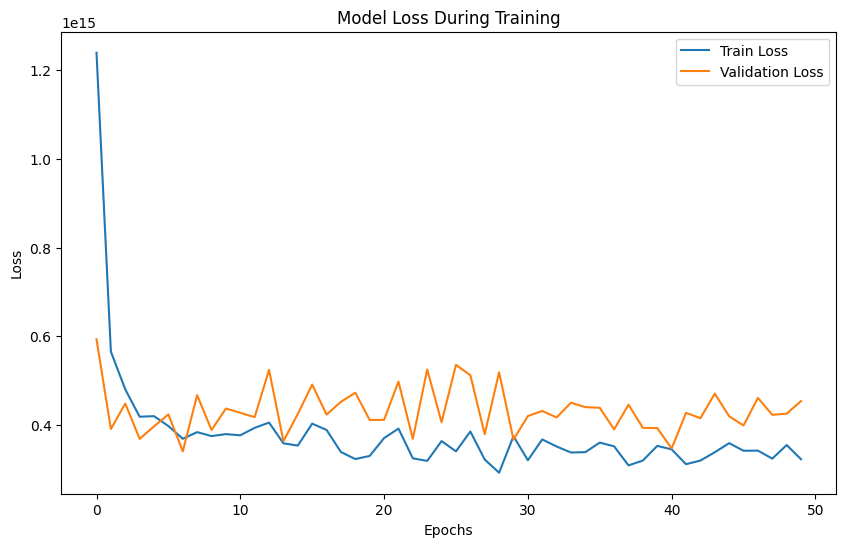

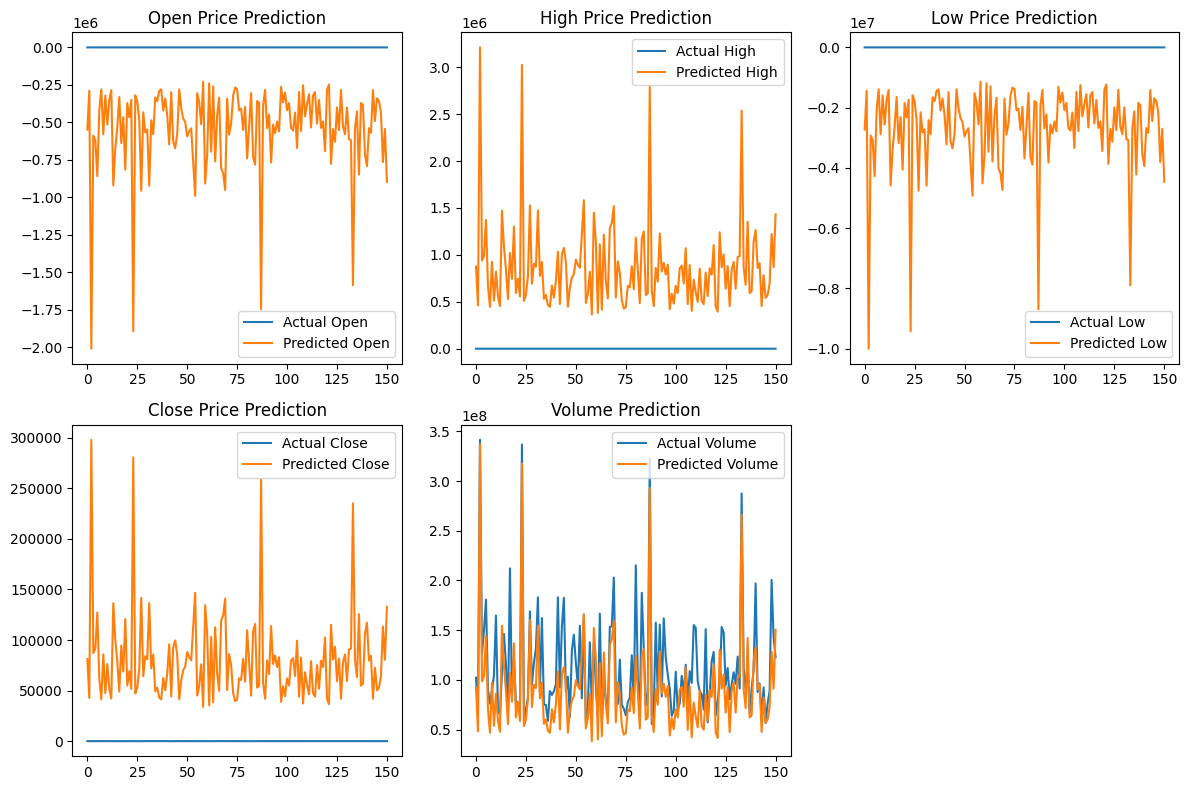

In [1]:

!pip install yfinance tensorflow pandas numpy scikit-learn matplotlib seaborn

import yfinance as yf
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 데이터 다운로드
ticker = 'AAPL'
data = yf.download(ticker, start="2020-01-01", end="2023-01-01")

# 타겟 변수를 예측할 수 있도록 설정: 각 특성들의 다음날 값을 타겟으로 이동
data['Target_Open'] = data['Open'].shift(-1)
data['Target_High'] = data['High'].shift(-1)
data['Target_Low'] = data['Low'].shift(-1)
data['Target_Close'] = data['Close'].shift(-1)
data['Target_Volume'] = data['Volume'].shift(-1)
data = data.dropna()

# 입력 변수(X)와 타겟 변수(y) 분리
X = data[['Open', 'High', 'Low', 'Close', 'Volume']].values
y = data[['Target_Open', 'Target_High', 'Target_Low', 'Target_Close', 'Target_Volume']].values

# 학습 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 정의
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(5)  # 출력층: 5개의 예측값 (시가, 고가, 저가, 종가, 거래량)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 학습
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# 예측 수행
y_pred = model.predict(X_test)

# 각 특성별 성능 평가 (평균 제곱 오차)
mse_open = np.mean((y_pred[:, 0] - y_test[:, 0]) ** 2)
mse_high = np.mean((y_pred[:, 1] - y_test[:, 1]) ** 2)
mse_low = np.mean((y_pred[:, 2] - y_test[:, 2]) ** 2)
mse_close = np.mean((y_pred[:, 3] - y_test[:, 3]) ** 2)
mse_volume = np.mean((y_pred[:, 4] - y_test[:, 4]) ** 2)

print(f"Mean Squared Error (Open): {mse_open}")
print(f"Mean Squared Error (High): {mse_high}")
print(f"Mean Squared Error (Low): {mse_low}")
print(f"Mean Squared Error (Close): {mse_close}")
print(f"Mean Squared Error (Volume): {mse_volume}")

# 학습 과정의 손실 그래프 시각화
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 예측 결과와 실제 값을 비교하는 그래프
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.plot(y_test[:, 0], label='Actual Open')
plt.plot(y_pred[:, 0], label='Predicted Open')
plt.title('Open Price Prediction')
plt.legend()

plt.subplot(2, 3, 2)
plt.plot(y_test[:, 1], label='Actual High')
plt.plot(y_pred[:, 1], label='Predicted High')
plt.title('High Price Prediction')
plt.legend()

plt.subplot(2, 3, 3)
plt.plot(y_test[:, 2], label='Actual Low')
plt.plot(y_pred[:, 2], label='Predicted Low')
plt.title('Low Price Prediction')
plt.legend()

plt.subplot(2, 3, 4)
plt.plot(y_test[:, 3], label='Actual Close')
plt.plot(y_pred[:, 3], label='Predicted Close')
plt.title('Close Price Prediction')
plt.legend()

plt.subplot(2, 3, 5)
plt.plot(y_test[:, 4], label='Actual Volume')
plt.plot(y_pred[:, 4], label='Predicted Volume')
plt.title('Volume Prediction')
plt.legend()

plt.tight_layout()
plt.show()